In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Leitura do arquivo csv

In [37]:
base_census = pd.read_csv('../databases/census.csv', sep=',')

### Primeiras cinco células e cinco últimas

In [38]:
base_census.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
base_census.tail(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Dados a serem análisados
Serão utilizadas todas as colunas para o aprendizado da máquina

### Visualização dos dados

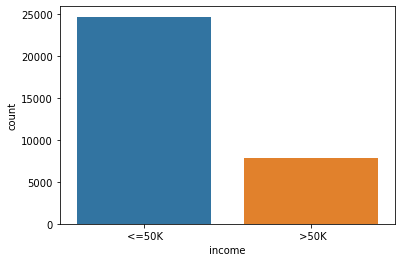

In [40]:
sns.countplot(x = base_census['income']);

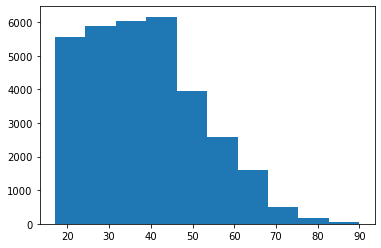

In [41]:
plt.hist(x = base_census['age']);

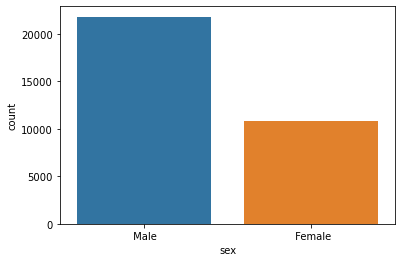

In [42]:
sns.countplot(x = base_census['sex']);

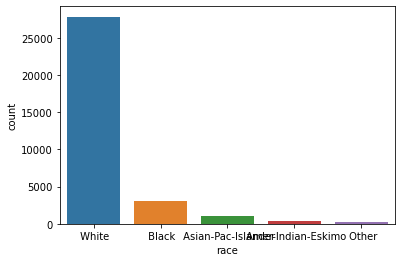

In [43]:
sns.countplot(x = base_census['race']);

### Pré-processamento

### Tratamento de valores inconsistentes:

Com a execução do comando describe podemos ver que não existe inconsistência com os dados

In [44]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Valores faltantes: 

Este dataframe não veio com valores nulos, por isso não é necessário tratar

In [45]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Divisão dos valores dos previsores e da classe

In [46]:
previsores = base_census.iloc[:, 0:14].values
classe = base_census.iloc[:,14].values

### Conversão das variáveis categóricas em numérica

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
previsores = one_hot.fit_transform(previsores).toarray()

### Padronização dos valores

Algumas colunas possuem valores pequenos em relação as outras colunas, por isso temos que tratar por padronizar os valores

In [48]:
from sklearn.preprocessing import StandardScaler

standart = StandardScaler()
previsores = standart.fit_transform(previsores)

### Separação das bases de treino e de teste

In [51]:
from sklearn.model_selection import train_test_split

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

### Salvar as variáveis que foram realizados os pré processos

In [52]:
import pickle

In [53]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([previsores_treinamento, classe_treinamento, previsores_teste, classe_teste], f)